# Flare Simulation Test

In [80]:
import simuFlares
import numpy as np

# Define time array, e.g. 3 days sampled every minute:
t = np.arange(0, 3*24*60, 2)  # in minutes

# Base half-peak timescale
t_half = 5.0  # e.g. 5 minutes

# Simulate 20 flares using Pareto for amplitudes
flare_lightcurve, flare_states = simuFlares.kepler_flare(
    t,       # time array
    t_half,        # base half-peak width
    20,            # number of flares
    flux_dist=simuFlares.rpareto,   # amplitude distribution
    xm=1.0, alpha=1.2, offset=0.2, upper=5.0
)

# 'flare_lightcurve, flare_states' is now a synthetic “flux” from flares alone;
# 'flare_states' marks which time steps are baseline (1), rising (2), or decaying (3).


## Plot

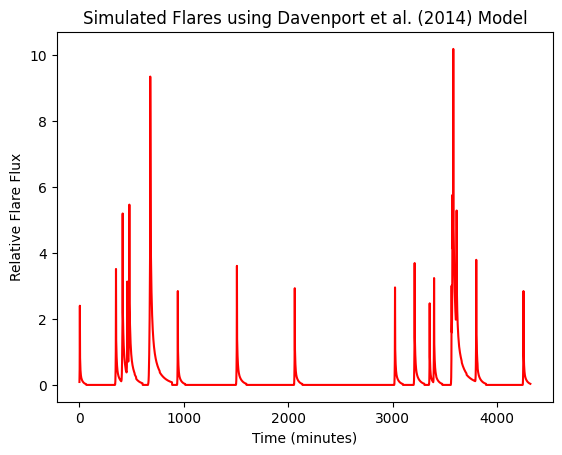

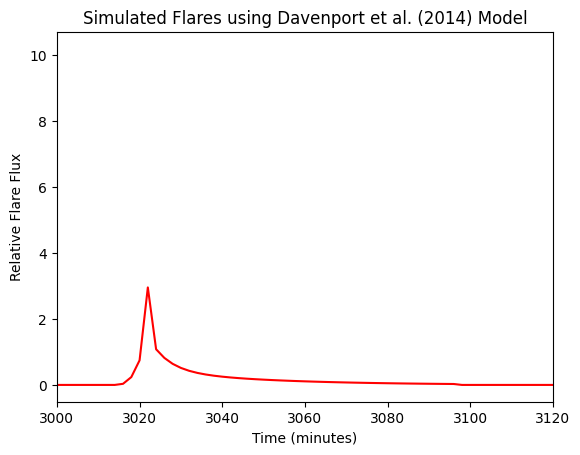

In [83]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t, flare_lightcurve, 'r-')
plt.xlabel("Time (minutes)")
plt.ylabel("Relative Flare Flux")
plt.title("Simulated Flares using Davenport et al. (2014) Model")
plt.show()

## Zoom in
plt.figure()
plt.plot(t, flare_lightcurve, 'r-')
plt.xlim((3000,3120))
plt.xlabel("Time (minutes)")
plt.ylabel("Relative Flare Flux")
plt.title("Simulated Flares using Davenport et al. (2014) Model")
plt.show()

# Flare Simulations

In [ ]:
## Data
import pandas as pd

pdcsap = pd.read_csv("../0.Data/031381302.csv", index_col = 'time').loc[:, ["pdcsap_flux"]].dropna()
# Check
# pdcsap.info()

# Times
# print(pdcsap.shape)
inds = np.arange(pdcsap.shape[0]); print(inds)

# pdcsap

[    0     1     2 ... 17030 17031 17032]


,pdcsap_flux
time,
1438.198088,1561.9932
1438.199477,1530.5082
1438.200866,1534.7330
1438.202255,1558.9431
1438.203644,1553.7203
...,...
1463.617418,1566.0736
1463.618806,1555.6083
1463.620195,1563.6069


## Standard Flares

In [ ]:
## Standard Flares
# Base half-peak timescale
t_half = 5.0  # e.g. 10 minutes (2-min cadence)
num_flares = 5
xm = 10
alpha = 1
offset = 0
upper = 150

# Simulate flares using Pareto for amplitudes
flare_lightcurve, flare_states = simuFlares.kepler_flare(
    inds,                           # time array
    t_half,                         # base half-peak width
    num_flares,                     # number of flares
    flux_dist=simuFlares.rpareto,   # amplitude distribution
    xm=xm, alpha=alpha, offset=offset, upper=upper
)

# 'flare_lightcurve, flare_states' is now a synthetic “flux” from flares alone;
# 'flare_states' marks which time steps are baseline (1), rising (2), or decaying (3).

In [ ]:
## Injection
inj_std = pdcsap.copy()
inj_std["pdcsap_flux"] += flare_lightcurve, flare_states

# flare_lightcurve, flare_states.sum()
# inj_std

## Plot

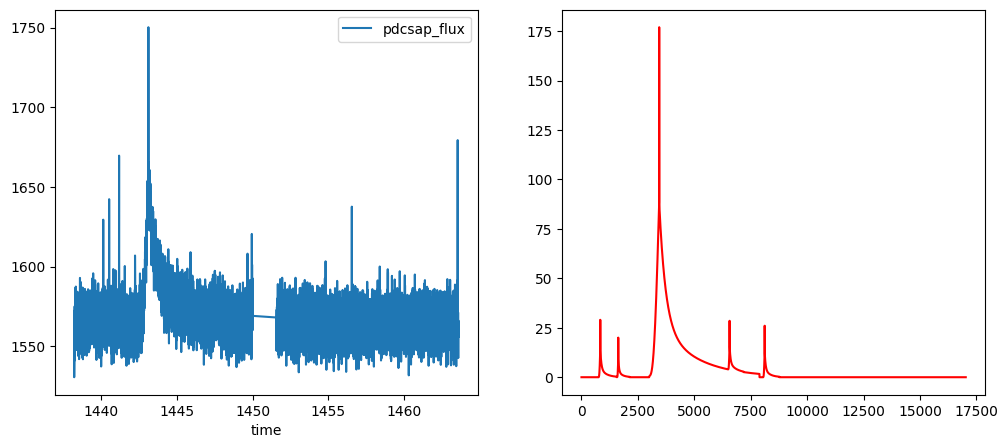

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

# Injected Time Series
inj_std.plot(ax = ax[0])

# Simulated Flares
ax[1].plot(inds, flare_lightcurve, 'r-')

plt.show()

## High-Emission Flares

In [ ]:
## Large Flares
t_half = 5.0  # e.g. 10 minutes (2-min cadence)
num_flares = 5
xm = 10
alpha = 1
offset = 0
upper = 150

# Simulate flares using Pareto for amplitudes
flare_lightcurve, flare_states = simuFlares.kepler_flare(
    inds,                           # time array
    t_half,                         # base half-peak width
    num_flares,                     # number of flares
    flux_dist=simuFlares.rpareto,   # amplitude distribution
    xm=xm, alpha=alpha, offset=offset, upper=upper
)

## Injection
inj_high = pdcsap.copy()
inj_high["pdcsap_flux"] += flare_lightcurve, flare_states

## Plot

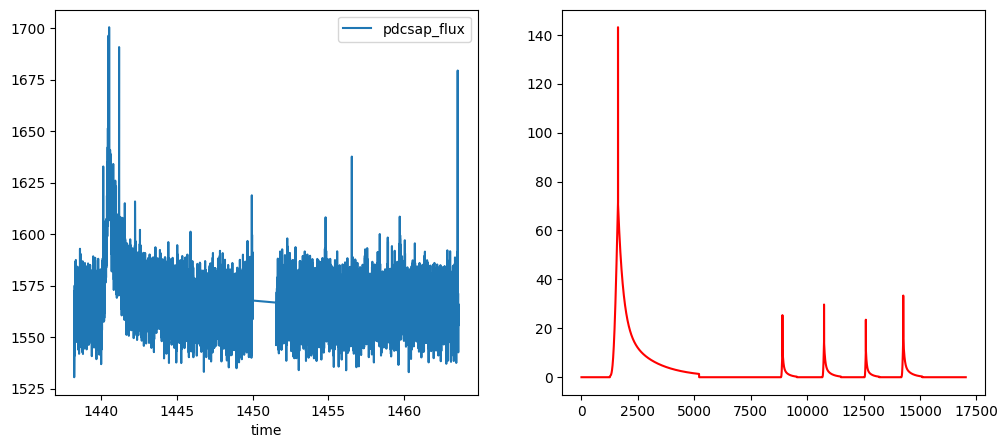

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

# Injected Time Series
inj_high.plot(ax = ax[0])

# Simulated Flares
ax[1].plot(inds, flare_lightcurve, 'r-')

plt.show()

## Low-Emission Flares

In [ ]:
## Large Flares
t_half = 5.0  # e.g. 10 minutes (2-min cadence)
num_flares = 5
xm = 10
alpha = 1
offset = 0
upper = 150

# Simulate flares using Pareto for amplitudes
flare_lightcurve, flare_states = simuFlares.kepler_flare(
    inds,                           # time array
    t_half,                         # base half-peak width
    num_flares,                     # number of flares
    flux_dist=simuFlares.rpareto,   # amplitude distribution
    xm=xm, alpha=alpha, offset=offset, upper=upper
)

## Injection
inj_low = pdcsap.copy()
inj_low["pdcsap_flux"] += flare_lightcurve, flare_states

## Plot

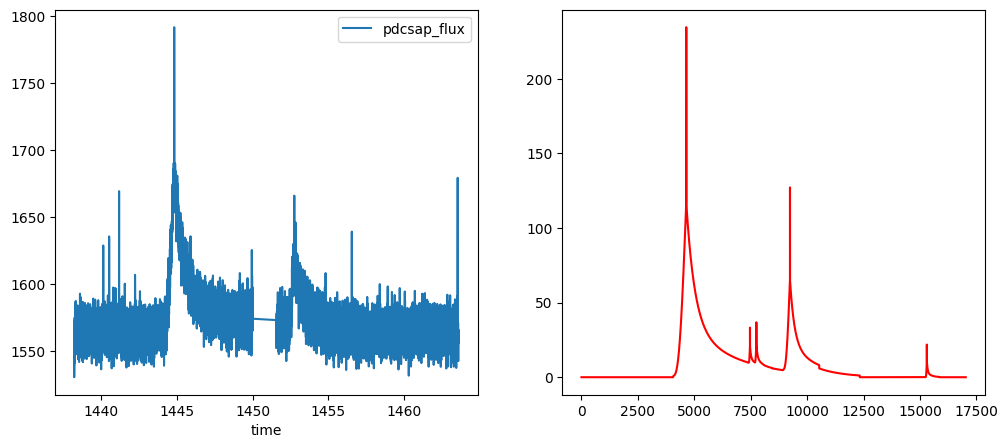

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

# Injected Time Series
inj_low.plot(ax = ax[0])

# Simulated Flares
ax[1].plot(inds, flare_lightcurve, 'r-')

plt.show()